In [1]:
import pandas as pd
import numpy as np
import re

def drop_chars(dist): 
    return re.sub("[^\d\.]", "", dist)

#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [3]:
cart = pd.read_excel("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/raw_data/cd_cart_square.xlsx")

In [4]:
cart.shape

(435, 6)

In [5]:
#create unique district codes
cart["dist"] = cart["dist"].astype(str)
cart["dist"] = np.where(cart["dist"].str[0] == "0", "AL", cart["dist"])
cart["ST#"] = cart["ST"] + cart["dist"].astype(str)
cart.shape

(435, 7)

In [6]:
#load in other relevant data
data_118 = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/clean_data/full_districts/data_118.csv")
converter = pd.read_csv("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/metric_converter.csv")

In [7]:
len(data_118["ST#"].unique())

435

In [8]:
#merge
cart = cart.merge(data_118.drop(columns="ST"), on='ST#')
cart = cart.merge(converter, on="metric")

In [9]:
print(cart.shape)
cart.head()

(435, 14)


,FIPS,X,Y,State,ST,dist,ST#,year,congress,PVI,metric,lean,pvi_range,prob_GOP
0,1,24,24,Alabama,AL,4,AL4,2022,118,R+33,0.83,NaN,R+21+,1.000000
1,1,25,24,Alabama,AL,5,AL5,2022,118,R+17,0.67,NaN,R+8 to R+20,0.953509
2,1,25,26,Alabama,AL,2,AL2,2022,118,R+17,0.67,NaN,R+8 to R+20,0.953509
3,21,27,17,Kentucky,KY,4,KY4,2022,118,R+17,0.67,NaN,R+8 to R+20,0.953509
4,22,19,26,Louisiana,LA,5,LA5,2022,118,R+17,0.67,NaN,R+8 to R+20,0.953509


In [10]:
prev_states = []
cart['State Status'] = np.where(cart["ST"].isin(prev_states), 'Incomplete Map', 'Complete Map')

In [11]:
#import and format url
url = "https://ballotpedia.org/United_States_House_of_Representatives_elections,_2022"
page = pd.read_html(url)
# Isolate the table of open seats
os = page[4]
# Remove lengthy column text
os.columns = ["seat", "incumbent", "reason"]
# Reformat to ST#
os = os.seat.str.rsplit(' ', 1, expand=True)
os.columns=["ST","dist"]
os["ST"] = os["ST"].str.replace("'s","").str.replace("'","")
os["dist"] = os["dist"].apply(drop_chars)
os = os.replace({"ST": us_state_to_abbrev})
open_list = list(os["ST"] + os["dist"])

In [12]:
cart['Incumbency'] = np.where(cart["ST#"].isin(open_list), 'Open Seat', 'Incumbent Running')

In [13]:
X = np.repeat(1,23), np.repeat(2,23), np.repeat(3,23),np.repeat(4,23),np.repeat(5,21),np.repeat(6,19),np.repeat(7,17),np.repeat(8,15),np.repeat(9,13),np.repeat(10,11),np.repeat(11,9),np.repeat(12,7),np.repeat(13,5),np.repeat(14,3),np.repeat(15,3),np.repeat(16,1),np.repeat(17,1),np.repeat(21,1),np.repeat(25,1),np.repeat(26,1),np.repeat(27,3),np.repeat(28,3),np.repeat(29,5),np.repeat(30,7),np.repeat(31,9),np.repeat(32,11),np.repeat(33,13),np.repeat(34,15),np.repeat(35,17),np.repeat(36,19),np.repeat(37,21),np.repeat(38,23),np.repeat(39,23),np.repeat(40,23),np.repeat(41,23)

In [14]:
#create a better range function
def btw(j,k):
    return list(range(j,k))

In [15]:
Y = [btw(4,27),btw(4,27),btw(4,27),btw(4,27),btw(5,26),btw(6,25),btw(7,24),btw(8,23),btw(9,22),btw(10,21),btw(11,20),btw(12,19),btw(13,18),btw(14,17),btw(14,17),15,15,15,15,15,btw(14,17),btw(14,17),btw(13,18),btw(12,19),btw(11,20),btw(10,21),btw(9,22),btw(8,23),btw(7,24),btw(6,25),btw(5,26),btw(4,27),btw(4,27),btw(4,27),btw(4,27)]

In [16]:
X = [item for sublist in X for item in sublist]
from iteration_utilities import deepflatten
Y = list(deepflatten(Y))

In [17]:
print(len(X),len(Y))

435 435


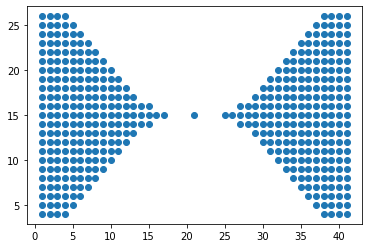

In [18]:
div = cart.sort_values(["metric","ST"])
div = div.drop(columns=["X","Y"])
div["X"] = X
div["Y"] = Y
#check shape
import matplotlib.pyplot as plt
plt.scatter(div.X,div.Y)

In [19]:
cart["View"] = "Cartogram"
div["View"] = "Median District"

In [20]:
square = pd.concat([cart,div])

In [21]:
square.to_excel("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/cd_cart_square_118.xlsx", index = False)

In [22]:
#offset every other row so the hexes will align
div["X"] = np.where(((div["Y"] % 2) != 0) & (div["X"] > 22), div['X'], (div["X"] - .5))
div["X"] = np.where(((div["Y"] % 2) != 0) & (div["X"] < 20), div['X'], (div["X"] + .5))

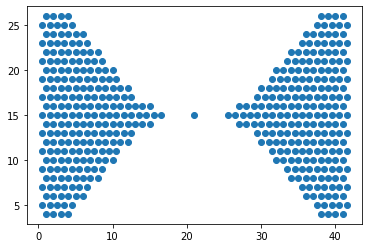

In [23]:
#check shape
import matplotlib.pyplot as plt
plt.scatter(div.X,div.Y)

In [24]:
#offset every other row so the hexes will align
cart["X"] = np.where((cart["Y"] % 2) == 0, cart['X'], (cart["X"] + .5))

In [25]:
hexes = pd.concat([cart,div])

In [26]:
hexes.to_excel("/Users/xavier/Desktop/DSPP/solo_projects/redistricting_project/processed/cd_cart_hex_118.xlsx", index = False)